In [1]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [3]:
train_images.shape


(60000, 28, 28)

In [4]:
train_images[1,25,14]

207

In [5]:
train_labels[:]

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

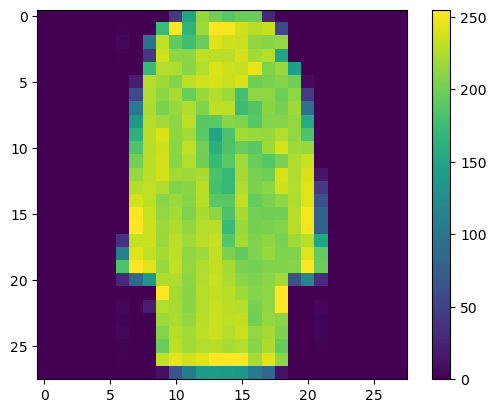

In [7]:
plt.figure()
plt.imshow(train_images[23000])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
train_images[1,25,14]

0.8117647058823529

# Building the Model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and watch the magic!

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1870 - accuracy: 0.9282


# Evaluating the model

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3492 - accuracy: 0.8866
Test accuracy: 0.8866000175476074


In [18]:
predictions = model.predict(test_images)

313/313 [==============================] - 3s 2ms/step


In [21]:
predictions[0].argmax()

9

In [22]:
test_labels[0]

9

Pick a number: 567
1/1 [==============================] - 0s 47ms/step
label :  Sandal guess :  Sandal


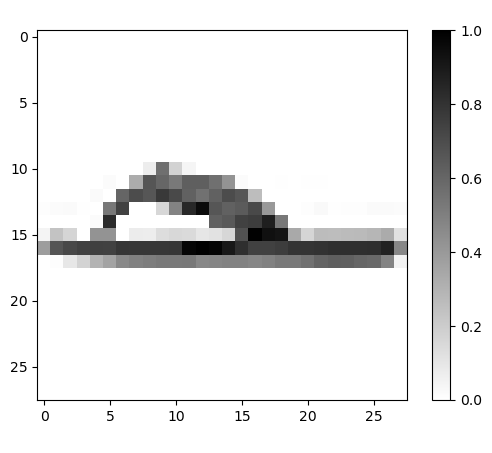

In [32]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    print('label : ',label,"guess : ",guess)
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
        if 0 <= num <= 1000:
            return int(num)
        else:
            print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)